# <u>House Price Prediction Model</u>

## 1. Problem Definition and Planning

### Problem Definition

In recent years, the real estate market has seen significant growth and volatility, making the prediction of house prices a crucial task for homeowners, real estate agents, investors, and policymakers. Accurate prediction models can provide valuable insights into market trends, helping stakeholders make informed decisions.

### Project Objective

The objective of this project is to develop a machine learning model that accurately predicts house prices based on various features of the properties. By analyzing key attributes such as lot area, overall quality, age of the house, exterior quality, first floor square footage, number of garage cars, and total rooms above ground, we aim to create a robust predictive model that can assist in estimating the value of residential properties.

### Resources

The [dataset](https://www.kaggle.com/competitions/home-data-for-ml-course/data) used in this project is a comprehensive collection of house sales data. It includes various features that potentially influence the price of a house. These features are:

- **LotArea**: Lot size in square feet.
- **OverallQual**: Overall material and finish quality.
- **ExterQual**: Quality of the material on the exterior.
- **1stFlrSF**: First floor square footage.
- **GarageCars**: Number of cars that can fit in the garage.
- **TotRmsAbvGrd**: Total number of rooms above ground level (excluding bathrooms). etc.

**Note:** Explore More Features in [data_description.txt](data_description.txt) file. 

The target variable is **SalePrice**, which represents the sale price of the house.

### Methodology

To achieve the project objective, various machine learning algorithms were explored, including:
- **Linear Regression**: A basic and widely used model for regression tasks.
- **Decision Tree Regressor**: A non-linear model that splits the data into branches to make predictions.
- **Random Forest Regressor**: An ensemble learning method that builds multiple decision trees and merges them to improve accuracy and control overfitting.

After evaluating these models based on performance metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and the R² Score, the best-performing model was selected for the final prediction task.

### Evaluation Metrics

The following metrics were used to evaluate the models:

- **Mean Absolute Error (MAE)**: Measures the average magnitude of the errors in a set of predictions, without considering their direction.
- **Mean Squared Error (MSE)**: Measures the average of the squares of the errors, penalizing larger errors more than smaller ones.
- **Root Mean Squared Error (RMSE)**: The square root of the MSE, providing an error measure in the same units as the target variable.
- **R² Score (Coefficient of Determination)**: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.

### Conclusion

This project demonstrates the application of machine learning techniques in predicting house prices, highlighting the importance of feature selection and model evaluation in developing an accurate and reliable predictive model. The insights gained from this project can be leveraged by various stakeholders to make informed decisions in the real estate market.

---

## 2. Data Preprocessing & Collection

- Importing necessary modules i.e, <mark>pandas</mark>, <mark>matplotlib</mark> & <mark>seaborn</mark>, for Data Collection & Data preprocessing process

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Read the CSV file

In [2]:
train_data = pd.read_csv('..\\data\\train.csv')

- Preview the Features

In [3]:
print(train_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

- Display Basic Information about the datasets

In [4]:
# Display basic information about the datasets
print("Training Data Info:")
print(train_data.info())

# Display summary statistics for numerical columns
print("\nTraining Data Description:")
print(train_data.describe())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

### Handling Missing Values in Machine Learning Datasets

#### Understanding the Issue

In many machine learning datasets, missing values are common and can be represented in various forms such as 'NA', 'NaN', or blanks. However, in some cases, these missing values may actually represent meaningful information rather than mere data gaps. This issue is particularly crucial when:

- **NA as a Categorical Value**: Some columns in the dataset may use 'NA' or similar terms to denote a specific category such as "Not Applicable", "No Basement", or "No Garage".
- **Preserving Information**: It's essential to preserve the meaning behind these missing values rather than treating them as random or meaningless data gaps.

In [5]:
# Check for missing values in the training data
print("Missing Values in Training Data:")
for col in train_data.columns:
    missing_count = train_data[col].isnull().sum()
    if missing_count > 0:
        print(f"{col}: {missing_count} missing values")

Missing Values in Training Data:
LotFrontage: 259 missing values
Alley: 1369 missing values
MasVnrType: 872 missing values
MasVnrArea: 8 missing values
BsmtQual: 37 missing values
BsmtCond: 37 missing values
BsmtExposure: 38 missing values
BsmtFinType1: 37 missing values
BsmtFinType2: 38 missing values
Electrical: 1 missing values
FireplaceQu: 690 missing values
GarageType: 81 missing values
GarageYrBlt: 81 missing values
GarageFinish: 81 missing values
GarageQual: 81 missing values
GarageCond: 81 missing values
PoolQC: 1453 missing values
Fence: 1179 missing values
MiscFeature: 1406 missing values


### Exploring Features in the Training Dataset

Before building and training our machine learning model, it's crucial to understand the various features present in our training dataset. Let's explore what features we have and their significance:

1. **LotArea**: The size of the lot in square feet. Larger lot sizes may contribute to higher house prices.
2. **OverallQual**: Overall material and finish quality of the house. Higher quality generally correlates with higher prices.
3. **age_of_house**: The age of the house at the time of sale, calculated as the difference between the year sold and the year built. This helps capture the depreciation or appreciation of the property over time.
4. **ExterQual**: Quality of the material on the exterior of the house. Better exterior quality can positively impact the house's value.
5. **1stFlrSF**: Square footage of the first floor. Larger first floors may indicate more spacious living areas, potentially increasing the house price.
6. **GarageCars**: The number of cars that can fit in the garage. More garage space can be a desirable feature, especially in suburban areas.
7. **TotRmsAbvGrd**: Total number of rooms above ground level (excluding bathrooms). More rooms often mean a larger, more versatile living space, which can enhance the property's value.

And Many More Feature Available to us.

Additionally, our target variable is:

- **SalePrice**: The sale price of the house, which we aim to predict using the above features.

Understanding these features will help us in preprocessing the data, selecting appropriate models, and interpreting the results effectively..

In [6]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Feature Engineering

#### Creating `age_of_house`

In this project, a new feature called `age_of_house` was engineered to capture the age of the house at the time of sale. This feature is calculated by subtracting the year the house was built (`YearBuilt`) from the year it was sold (`YrSold`). This new feature provides a more intuitive understanding of the house's age, which is an important factor in determining its price.

`age_of_house = YrSold - YearBuilt`

This feature helps to better capture the relationship between the age of the property and its market value, as older houses might have different valuations compared to newer ones.

In [7]:
train_data['age_of_house'] = train_data['YrSold'] - train_data['YearBuilt']

### Data Transformation

To prepare our dataset for training the machine learning model, we need to transform some categorical columns into their respective numerical formats. This transformation is necessary because most machine learning algorithms require numerical input data. We will map selected important features, which explain critical factors for determining the price of a house, into numerical values. These features include `ExterQual` (External Quality),`ExterCond` (External Condition), `GarageCond` (Garage Condition), `CentralAir` (Availability of Central Air), `Fence` (Fence Around House), `BsmtCond` (Basement Condition), and `Utilities`.

#### Feature Mapping

##### 1. ExterQual(External Quality) & ExterCond(External Condition)
- **Excellent**: 5
- **Good**: 4
- **Average/Typical**: 3
- **Fair**: 2
- **Poor**: 1

In [8]:
extern_qual_mapping = {
    'Ex': 5,   # Excellent
    'Gd': 4,   # Good
    'TA': 3,   # Average/Typical
    'Fa': 2,   # Fair
    'Po': 1    # Poor
}

extern_cond_mapping = {
    'Ex': 5,   # Excellent
    'Gd': 4,   # Good
    'TA': 3,   # Average/Typical
    'Fa': 2,   # Fair
    'Po': 1    # Poor
}

train_data['ExterQual'] = train_data['ExterQual'].map(extern_qual_mapping).astype(int)
train_data['ExterCond'] = train_data['ExterCond'].map(extern_cond_mapping).astype(int)

##### 2. GarageCond(Garage Condition)
- **Excellent**: 5
- **Good**: 4
- **Average/Typical**: 3
- **Fair**: 2
- **Poor**: 1
- **Not Availaible**: 0

In [9]:
# Define mapping of categories to numerical values, including 'NA'
garage_cond_mapping = {
    'Ex': 5,   # Excellent
    'Gd': 4,   # Good
    'TA': 3,   # Typical/Average
    'Fa': 2,   # Fair
    'Po': 1,   # Poor
    'NA': 0    # No Garage
}

# Replace categorical values with numerical values
train_data['GarageCond'] = train_data['GarageCond'].map(garage_cond_mapping).fillna(0).astype(int)

##### 3. Central Air(Availaibility of Centralised AC)
- **Yes**: 1
- **No**: 0

In [10]:
train_data['CentralAir'] = train_data['CentralAir'].map({'Y':1,'N':0})

##### 4. Fence(Fence Around House)
- **Good Privacy**: 4
- **Minimum Privacy**: 3
- **Good Wood**: 2
- **Minimum Wood/Wire**: 1
- **No Fence**: 0

In [11]:
fence_mapping = {
    'GdPrv': 4,   # Good Privacy
    'MnPrv': 3,   # Minimum Privacy
    'GdWo': 2,    # Good Wood
    'MnWw': 1,    # Minimum Wood/Wire
    'NA': 0       # No Fence
}

# Replace categorical values with numerical values
train_data['Fence'] = train_data['Fence'].map(fence_mapping).fillna(0).astype(int)

##### 5. BsmtCond(Basement Condition)
- **Excellent**: 5
- **Good**: 4
- **Typical - slight dampness allowed**: 3
- **Fair - dampness or some cracking or settling**: 2
- **Poor - Severe cracking, settling, or wetness**: 1
- **No Basement**: 0

In [12]:
# Define mapping of categories to numerical values, including 'NA'
bsmt_cond_mapping = {
    'Ex': 5,   # Excellent
    'Gd': 4,   # Good
    'TA': 3,   # Typical - slight dampness allowed
    'Fa': 2,   # Fair - dampness or some cracking or settling
    'Po': 1,   # Poor - Severe cracking, settling, or wetness
    'NA': 0    # No Basement
}

# Replace categorical values with numerical values
train_data['BsmtCond'] = train_data['BsmtCond'].map(bsmt_cond_mapping).fillna(0).astype(int)

##### 6. Utilities
- **All Public Utilities (E, G, W,& S)**: 3
- **Electricity and Gas Only**: 2
- **Electricity Only**:1
- **No Utilities**: 0

In [13]:
# Define mapping of categories to numerical values
utilities_mapping = {
    'AllPub': 4,   # All public Utilities (E,G,W,& S)
    'NoSewr': 3,   # Electricity, Gas, and Water (Septic Tank)
    'NoSeWa': 2,   # Electricity and Gas Only
    'ELO': 1       # Electricity only
}

# Replace categorical values with numerical values
train_data['Utilities'] = train_data['Utilities'].map(utilities_mapping).astype(int)

In [14]:
kitchen_qual_mapping = {
    'Ex': 5,   # Excellent
    'Gd': 4,   # Good
    'TA': 3,   # Average/Typical
    'Fa': 2,   # Fair
    'Po': 1    # Poor
}

train_data['KitchenQual'] = train_data['KitchenQual'].map(kitchen_qual_mapping).astype(int)

## 3. Exploratory Data Analysis

### Feature Selection and Target Variable

For building our machine learning model, we have selected a set of important features from the dataset that are likely to influence the house prices. The features have been chosen based on their relevance and significance in determining the value of a house. Additionally, we have defined the target variable, which is the house sale price.

### Selected Features

The following features have been selected for training the model:

- **LotArea**: Lot size in square feet.
- **Utilities**: Type of utilities available.
- **OverallQual**: Overall material and finish quality.
- **OverallCond**: Overall condition rating.
- **age_of_house**: Age of the house in years, calculated as the difference between the year sold and the year built.
- **ExterQual**: Quality of the material on the exterior.
- **1stFlrSF**: First floor square footage.
- **2ndFlrSF**: Second floor square footage.
- **BsmtCond**: Basement condition rating.
- **GarageCars**: Number of cars that can fit in the garage.
- **GarageArea**: Size of the garage in square feet.
- **PoolArea**: Pool area in square feet.
- **ExterCond**: Condition of the material on the exterior.
- **BedroomAbvGr**: Number of bedrooms above ground.
- **TotRmsAbvGrd**: Total number of rooms above ground level (excluding bathrooms).
- **GarageCond**: Garage condition rating.
- **KitchenQual**: Quality of Kitchen
- **CentralAir**: Availability of central air conditioning (Yes/No).
- **Fence**: Fence quality rating around the house.

- **X**: Contains the selected features from the training dataset.
- **Y**: Contains the target variable, `SalePrice`, which we aim to predict.

By selecting these features, we aim to build a robust predictive model that accurately captures the factors influencing house prices.

In [15]:
Features = ['LotArea','Utilities','OverallQual','OverallCond','age_of_house','ExterQual','1stFlrSF','2ndFlrSF','BsmtCond','GarageCars','GarageArea','PoolArea','ExterCond','BedroomAbvGr','TotRmsAbvGrd','GarageCond','KitchenQual','CentralAir','Fence']
X = train_data[Features]
Y = train_data.SalePrice

In [16]:
X

,LotArea,Utilities,OverallQual,OverallCond,age_of_house,ExterQual,1stFlrSF,2ndFlrSF,BsmtCond,GarageCars,GarageArea,PoolArea,ExterCond,BedroomAbvGr,TotRmsAbvGrd,GarageCond,KitchenQual,CentralAir,Fence
0,8450,4,7,5,5,4,856,854,3,2,548,0,3,3,8,3,4,1,0
1,9600,4,6,8,31,3,1262,0,3,2,460,0,3,3,6,3,3,1,0
2,11250,4,7,5,7,4,920,866,3,2,608,0,3,3,6,3,4,1,0
3,9550,4,7,5,91,3,961,756,4,3,642,0,3,3,7,3,4,1,0
4,14260,4,8,5,8,4,1145,1053,3,3,836,0,3,4,9,3,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,4,6,5,8,3,953,694,3,2,460,0,3,3,7,3,3,1,0
1456,13175,4,6,6,32,3,2073,0,3,2,500,0,3,3,7,3,3,1,3
1457,9042,4,7,9,69,5,1188,1152,4,1,252,0,4,4,9,3,4,1,4
1458,9717,4,5,6,60,3,1078,0,3,1,240,0,3,2,5,3,4,1,0


In [17]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

### Correlation Matrix and Heatmap

To understand the relationships between the selected features and the target variable (`SalePrice`), we calculate the correlation matrix. The correlation matrix provides insights into the linear relationships between each pair of features, as well as between the features and the target variable. Visualizing this matrix with a heatmap helps us quickly identify strong correlations that can be critical for our model.

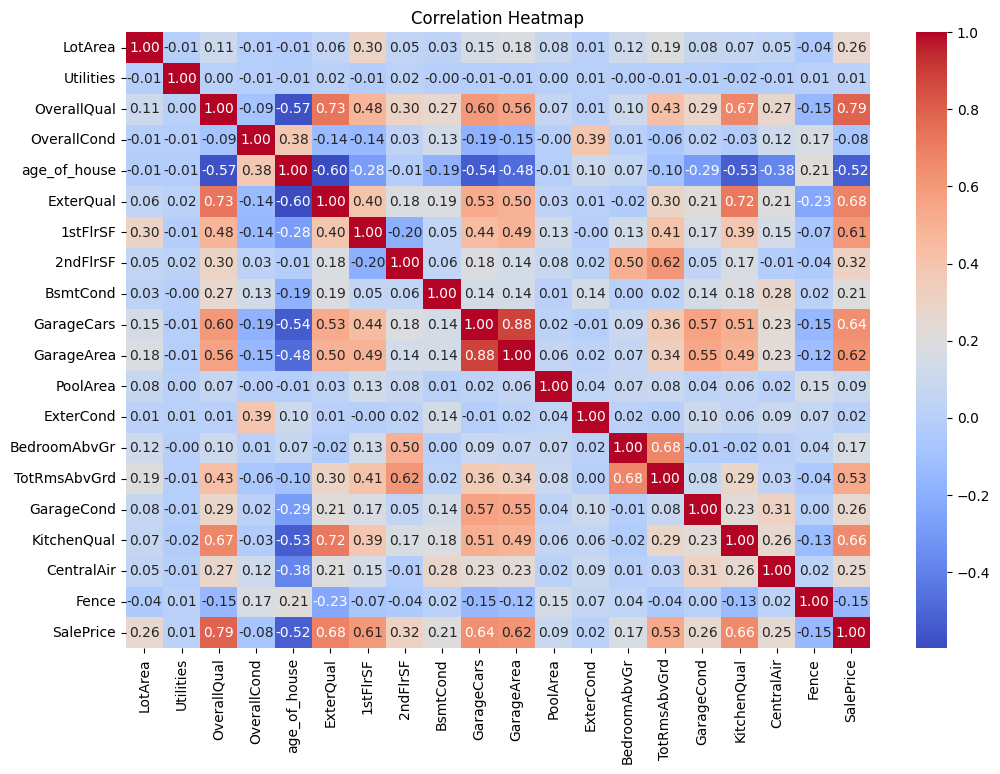

In [18]:
# Calculate correlation matrix
corr_matrix = X.join(Y).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

### Verification of Feature Selection

Based on the correlation heatmap, the chosen features all have significant correlations with the target variable `SalePrice`:

- **LotArea (0.26)**: Moderate positive correlation.
> Since it seems not strong correlation, but it is one of the important factor, which cannot be denied during the setting the price of house.
- **OverallQual (0.79)**: Strong positive correlation.
- **age_of_house (-0.52)**: Moderate negative correlation.
- **ExterQual (0.68)**: Strong positive correlation.
- **1stFlrSF (0.61)**: Strong positive correlation.
- **GarageCars (0.64)**: Strong positive correlation.
- **TotRmsAbvGrd (0.53)**: Moderate positive correlation.
- **KitchenQual (0.66)**: Strong positive correlation

## 4. Feature Selection

Feature selection is a critical step in the machine learning pipeline. It involves identifying and selecting the most relevant features that have a significant impact on the target variable. This process helps in improving the performance of the model by reducing overfitting, enhancing generalization, and reducing computational costs.

### Identify Relevant Features

Selecting features that are most likely to influence the target variable is crucial for building an effective predictive model. Based on the correlation analysis and domain knowledge, we have selected the following features for training our model:

- `LotArea`
- `OverallQual`
- `age_of_house`
- `ExterQual`
- `1stFlrSF`
- `GarageCars`
- `TotRmsAbvGrd`
- `KitchenQual`

### Reduce Dimensionality

To further optimize the model, dimensionality reduction techniques such as PCA (Principal Component Analysis) or feature importance ranking can be employed. These techniques help in reducing the number of features while retaining the most informative ones, thereby simplifying the model and improving its performance.

> This selection of features is based on their relevance and significance in predicting the sale price of houses. By focusing on these features, we aim to build a more accurate and efficient model.

In [19]:
Selected_Features_For_Training_Model = ['LotArea','OverallQual','age_of_house','ExterQual','1stFlrSF','GarageCars','TotRmsAbvGrd','KitchenQual']
X = train_data[Selected_Features_For_Training_Model]
Y = train_data['SalePrice']

In [20]:
import json

ExternQual = {
    'Excellent': 5,
    'Good': 4,
    'Average/Typical': 3,
    'Fair': 2,
    'Poor': 1 
}

OverallQual = {
    "Very Excellent" : 10,
    "Excellent" : 9,
    "Very Good" : 8,
    "Good" : 7,
    "Above Average" : 6,
    "Average" : 5,
    "Below Average" : 4,
    "Fair" : 3,
    "Poor" : 2,
    "Very Poor" : 1
}

KitchenQual = {
    "Excellent": 5,
    "Good" : 4,
    "Typical/Average" : 3,
    "Fair" : 2,
    "Poor" : 1
}

# Define file path to save mappings
file_path = 'categorical_mappings.json'

# Create a dictionary to hold all mappings
all_mappings = {
    'ExternQual': ExternQual,
    'OverallQual': OverallQual,
    'KitchenQual': KitchenQual,
}

# Save mappings to a JSON file
with open(file_path, 'w') as f:
    json.dump(all_mappings, f, indent=4)

print(f"Mappings saved to {file_path}")

Mappings saved to categorical_mappings.json


## 5. Model Selection and Training

### Choose Algorithms
For predicting house prices, we will use three different algorithms to evaluate their performance:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor

### Split Data
We will divide the dataset into training and validation sets to train the models and validate their performance.

### Train Models
We will fit the chosen algorithms on the training data and validate their performance on the validation set.

### Hyperparameter Tuning
To improve the performance of the models, we will perform hyperparameter tuning using techniques like grid search or random search. For this example, we will use default parameters.

In [26]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Assuming X and Y are defined and contain the dataset features and target
# Split the data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, Y, random_state=1)

# Function to evaluate and print the performance of the model
def evaluate_model(model, val_X, val_y):
    # Predict the target values
    val_predictions = model.predict(val_X)
    
    # Calculate metrics
    mae = mean_absolute_error(val_y, val_predictions)
    mse = mean_squared_error(val_y, val_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(val_y, val_predictions)
    
    # Print metrics
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R2 Score: {r2}")
    print("\n")
    
    return {
        "Model": model.__class__.__name__,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2,
    }

# List to store the evaluation results
results = []

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)
results.append(evaluate_model(linear_model, val_X, val_y))

# Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=1)
decision_tree_model.fit(train_X, train_y)
results.append(evaluate_model(decision_tree_model, val_X, val_y))

# Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=1)
random_forest_model.fit(train_X, train_y)
results.append(evaluate_model(random_forest_model, val_X, val_y))

# Print summary of results
results_df = pd.DataFrame(results)
print(results_df)

Model: LinearRegression
Mean Absolute Error (MAE): 24815.800315681732
Mean Squared Error (MSE): 1480852512.7106733
Root Mean Squared Error (RMSE): 38481.84653457619
R2 Score: 0.7794127498341599


Model: DecisionTreeRegressor
Mean Absolute Error (MAE): 28984.035616438356
Mean Squared Error (MSE): 2169339568.4027395
Root Mean Squared Error (RMSE): 46576.16953338627
R2 Score: 0.6768559691376875


Model: RandomForestRegressor
Mean Absolute Error (MAE): 20907.066430528375
Mean Squared Error (MSE): 1053675359.9062835
Root Mean Squared Error (RMSE): 32460.365985402623
R2 Score: 0.8430449027069042


                   Model           MAE           MSE          RMSE        R2
0       LinearRegression  24815.800316  1.480853e+09  38481.846535  0.779413
1  DecisionTreeRegressor  28984.035616  2.169340e+09  46576.169533  0.676856
2  RandomForestRegressor  20907.066431  1.053675e+09  32460.365985  0.843045


## 6. Model Evaluation Metrics

### Model Performance Comparison

After training and evaluating three different models on the selected features, we obtained the following performance metrics:

| Model                  | MAE             | MSE            | RMSE           | R2 Score   |
|------------------------|-----------------|----------------|----------------|------------|
| Linear Regression      | 24,815.80       | 1.48e+09       | 38,481.85      | 0.779413   |
| Decision Tree Regressor| 28,984.04       | 2.17e+09       | 46,576.17      | 0.676856   |
| Random Forest Regressor| 20,907.07       | 1.05e+09       | 32,460.37      | 0.843045   |

#### Interpretation of Results

- **Linear Regression Model**
  - **MAE:** 24,815.80
  - **MSE:** 1.48e+09
  - **RMSE:** 38,481.85
  - **R2 Score:** 0.779413
  - The linear regression model shows a reasonable performance with an R2 score of 0.779413, indicating that it explains approximately 78% of the variance in the sale price. However, it has higher MAE and RMSE compared to the Random Forest model.

- **Decision Tree Regressor**
  - **MAE:** 28,984.04
  - **MSE:** 2.17e+09
  - **RMSE:** 46,576.17
  - **R2 Score:** 0.676856
  - The decision tree regressor has the lowest performance among the three models with an R2 score of 0.676856. It also has the highest MAE and RMSE, indicating less accuracy and higher prediction errors.

- **Random Forest Regressor**
  - **MAE:** 20,907.07
  - **MSE:** 1.05e+09
  - **RMSE:** 32,460.37
  - **R2 Score:** 0.843045
  - The random forest regressor outperforms both the linear regression and decision tree models. It has the lowest MAE and RMSE, indicating the highest accuracy and the lowest prediction errors. The R2 score of 0.843045 shows that it explains approximately 84% of the variance in the sale price, making it the most reliable model among the three.

#### Conclusion and Model Selection for Deployment

Based on the evaluation metrics, the **Random Forest Regressor** is the best-performing model for predicting house prices. It has the lowest Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE), and the highest R2 score. Therefore, we will use the Random Forest Regressor for deployment purposes, as it provides the most accurate and reliable predictions for house prices in our dataset.

### Understanding MAE, MSE, RMSE, and R² Score

These metrics are commonly used to evaluate the performance of regression models. Each provides different insights into the accuracy and goodness of a model's predictions.

#### Mean Absolute Error (MAE)

**Definition**: MAE is the average of the absolute errors between the predicted and actual values.

![](mae.png)

- **Interpretation**: It gives a measure of the average magnitude of the errors in a set of predictions, without considering their direction.
- **Usefulness**: It is easy to understand and interpret, providing a straightforward measure of prediction accuracy. However, it does not punish large errors as severely as MSE or RMSE.

#### Mean Squared Error (MSE)

**Definition**: MSE is the average of the squared errors between the predicted and actual values.

![](mse.png)

- **Interpretation**: It gives a measure of the average squared difference between the predicted and actual values. 
- **Usefulness**: It penalizes larger errors more than smaller ones, making it more sensitive to outliers. It is widely used in regression analysis but can be harder to interpret directly.

#### Root Mean Squared Error (RMSE)

**Definition**: RMSE is the square root of the average of the squared errors between the predicted and actual values.

![](rmse.png)

- **Interpretation**: It provides an error measure in the same units as the target variable, making it more interpretable than MSE.
- **Usefulness**: Like MSE, it penalizes larger errors more than smaller ones, but its interpretability in the context of the data makes it a preferred metric for many practitioners.

#### R² Score (Coefficient of Determination)

**Definition**: R² measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

![](r_2.png)

- **Interpretation**: It ranges from 0 to 1, where:
  - 1 indicates the model perfectly explains the variance in the data.
  - 0 indicates the model does not explain the variance better than the mean.
  - Negative values indicate that the model is worse than a simple mean of the target variable.
- **Usefulness**: It provides a measure of how well the independent variables explain the variability of the dependent variable, making it a good indicator of model goodness.

### How These Metrics Help in Predicting ML Model Accuracy and Goodness

- **MAE**: Helps understand the average prediction error. A lower MAE indicates better model accuracy.
- **MSE**: Provides insight into the model's error sensitivity, with a lower MSE indicating better model performance. It is more sensitive to outliers than MAE.
- **RMSE**: Combines the advantages of MSE with easier interpretability. A lower RMSE indicates better model accuracy.
- **R² Score**: Indicates how well the model captures the variance in the data. A higher R² score (closer to 1) indicates a better model.

### Summary

- **MAE**: Good for understanding the average error magnitude.
- **MSE**: Useful for penalizing larger errors and understanding overall error magnitude.
- **RMSE**: Preferred for its interpretability and sensitivity to larger errors.
- **R² Score**: Provides a measure of the explanatory power of the model.

Together, these metrics give a comprehensive picture of model performance, helping you to understand both the accuracy and the goodness of fit of your regression models.

### Differences Between `LinearRegressor`, `DecisionTreeRegressor`, and `RandomForestRegressor`

#### Linear Regressor (Linear Regression)
- **Approach**: Linear Regression tries to model the relationship between the dependent variable (house price) and one or more independent variables (features) by fitting a linear equation to the observed data.
- **Strengths**: Simple, interpretable, works well with linearly separable data.
- **Weaknesses**: Assumes linear relationships between features and target, sensitive to outliers.

#### Decision Tree Regressor
- **Approach**: Decision Tree Regression splits the data into subsets based on the feature values, creating a tree-like model of decisions. Each node represents a feature, each branch represents a decision rule, and each leaf represents the outcome.
- **Strengths**: Captures non-linear relationships, easy to visualize, handles both numerical and categorical data, not sensitive to outliers.
- **Weaknesses**: Prone to overfitting, especially with deep trees.

#### Random Forest Regressor
- **Approach**: Random Forest Regression builds multiple decision trees (an ensemble) and merges their results (either by averaging or voting) to improve the predictive performance and control overfitting.
- **Strengths**: Reduces overfitting (compared to a single decision tree), handles non-linear relationships, robust to noise and outliers, provides feature importance.
- **Weaknesses**: More complex, longer training time, less interpretable than a single decision tree.

### Best Model for Predicting House Prices

Given the features `LotArea`, `OverallQual`, `age_of_house`, `ExterQual`, `1stFlrSF`, `GarageCars`, and `TotRmsAbvGrd`, it's important to choose a model that can handle potential non-linear relationships and interactions between these features and the target variable `SalePrice`.

## 7. Model Deployement and Monitoring

### Deploy Model
To deploy the model, we will integrate the trained Random Forest Regressor into production systems or applications. This involves saving the model and setting up an interface (e.g., a web application) that allows users to input features and receive predictions.

### Monitor Performance
Once deployed, we will continuously monitor the model's performance to ensure it remains accurate and reliable. This includes tracking metrics and performance over time, and retraining or updating the model as needed.

### Feedback Loop
We will establish a feedback loop to gather insights from users or stakeholders. This feedback will help us identify areas for improvement and make necessary adjustments to the model to enhance its performance and user experience.

### Saving the Model

First, we need to save the trained Random Forest Regressor model so that it can be loaded and used for predictions in the production environment.

In [ ]:
import joblib

# Save the Random Forest Regressor model to a file
model_filename = 'random_forest_regressor.pkl'
joblib.dump(random_forest_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to random_forest_regressor.pkl
